<a href="https://colab.research.google.com/github/Gilbert9172/AI_Project/blob/main/n233a_feature_importances_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 3*

# 📝 Assignment
---
# Feature Importances

## 1) 지속적으로 포트폴리오 프로젝트를 수행하세요
- 지속적으로 데이터를 랭글링 하고 추가적인 시각화 결과를 만드세요
- 작성한 코드마다 적절한 코멘트를 추가하세요
- 모델을 학습시키고 베이스라인 모델과 비교해 보세요
- **포트폴리오 프로젝트의 베이스라인 모델이 무엇인지 한 문장으로 설명하여 과제 제출폼에 제출하세요.** 

# 전처리

In [109]:
# from google.colab import drive
# drive.mount('/content/drive')

In [110]:
import pandas as pd
import numpy as np

# 수집한 자료에서 train, test 미리 분리

FIFA_train = ('/content/drive/MyDrive/Section2/Project/csv_file/FIFA_train.csv')
FIFA_test = ('/content/drive/MyDrive/Section2/Project/csv_file/FIFA_test.csv')

train = pd.read_csv(FIFA_train, encoding = 'utf-8')
test = pd.read_csv(FIFA_test, encoding = 'utf-8')

train.shape, test.shape

((8932, 12), (3828, 11))

Train 전처리

In [111]:
# train Data 년도 통일 
def contract(col):

    for i in train[col]:

        if i == 'Jun 30, 2019':
            train.contract_until.replace('Jun 30, 2019', '2019', inplace=True)

        elif i == 'Jun 30, 2020':
            train.contract_until.replace('Jun 30, 2020', '2020', inplace=True)

        elif i == 'Dec 31, 2018':
            train.contract_until.replace('Dec 31, 2018', '2018', inplace=True)
    
        elif i == 'Jun 30, 2020':
            train.contract_until.replace('Jun 30, 2020', '2020', inplace=True)
    
        elif i == 'May 31, 2019':
            train.contract_until.replace('May 31, 2019', '2019', inplace=True)

        elif i == 'May 31, 2020':
            train.contract_until.replace('May 31, 2020', '2020', inplace=True)

        elif i == 'Jan 31, 2019':
            train.contract_until.replace('Jan 31, 2019', '2019', inplace=True)

        elif i == 'Jan 1, 2019':
            train.contract_until.replace('Jan 1, 2019', '2019', inplace=True)

        elif i == 'Jan 12, 2019':
            train.contract_until.replace('Jan 12, 2019', '2019', inplace=True)

        else:
            i==i

    return train[col].astype(int)

train['contract_until'] = contract('contract_until')

# 계약만료 : 0 , 계약미만료 :1

contract_Y_N = []

for i in train['contract_until']:

    if i > 2020:
        contract_Y_N.append(1)

    else:
        contract_Y_N.append(0)

train['contract_until'] = pd.Series(contract_Y_N)

# 왼발 : 0 , 오른발 :1

prefer_foot = []

for x in train['prefer_foot']:

    if x == 'right':
        prefer_foot.append(1)

    else:
        prefer_foot.append(0)

train['prefer_foot'] = pd.Series(prefer_foot)

# Convert float to int
train['reputation'] = train['reputation'].astype(int)

Test 전처리

In [112]:
# Test Data 년도 통일
def contract(col):

    for i in test[col]:

        if i == 'Jun 30, 2019':
            test.contract_until.replace('Jun 30, 2019', '2019', inplace=True)

        elif i == 'Jun 30, 2020':
            test.contract_until.replace('Jun 30, 2020', '2020', inplace=True)

        elif i == 'Dec 31, 2018':
            test.contract_until.replace('Dec 31, 2018', '2018', inplace=True)
        
        elif i == 'Dec 31, 2019':
            test.contract_until.replace('Dec 31, 2019', '2019', inplace=True)
    
        elif i == 'Jun 30, 2020':
            test.contract_until.replace('Jun 30, 2020', '2020', inplace=True)
    
        elif i == 'May 31, 2019':
            test.contract_until.replace('May 31, 2019', '2019', inplace=True)

        elif i == 'May 31, 2020':
            test.contract_until.replace('May 31, 2020', '2020', inplace=True)

        elif i == 'Jan 31, 2019':
            test.contract_until.replace('Jan 31, 2019', '2019', inplace=True)

        elif i == 'Jun 1, 2019':
            test.contract_until.replace('Jun 1, 2019', '2019', inplace=True)

        elif i == 'Jan 1, 2019':
            test.contract_until.replace('Jan 1, 2019', '2019', inplace=True)

        else:
            i==i

    return test[col].astype(int)

test['contract_until'] = contract('contract_until')

# 계약만료 : 0 , 계약미만료 :1

contract_test = []

for i in test['contract_until']:

    if i > 2020:
        contract_test.append(1)

    else:
        contract_test.append(0)

test['contract_until'] = pd.Series(contract_test)

# 왼발 : 0 , 오른발 :1

prefer_foot_test = []

for x in test['prefer_foot']:

    if x == 'right':
        prefer_foot_test.append(1)

    else:
        prefer_foot_test.append(0)

test['prefer_foot'] = pd.Series(prefer_foot_test)

# Convert float to int
test['reputation'] = test['reputation'].astype(int)

In [113]:
# 선수별 ID가 있기 때문에 col = name 제거
train.drop(['name'],axis=1,inplace=True)
test.drop(['name'],axis=1,inplace=True)

In [114]:
# dtypes확인
train.dtypes

id                    int64
age                   int64
continent            object
contract_until        int64
position             object
prefer_foot           int64
reputation            int64
stat_overall          int64
stat_potential        int64
stat_skill_moves    float64
value               float64
dtype: object

In [115]:
# 결측치 확인 

train.isnull().sum()

id                  0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

# 베이스라인 모델

- MAE_base = 3076644

In [116]:
y_mean_pred = train['value'].mean()
errors = train['value'] - y_mean_pred

MAE = errors.abs().mean()
print(MAE)

3076644.337602046


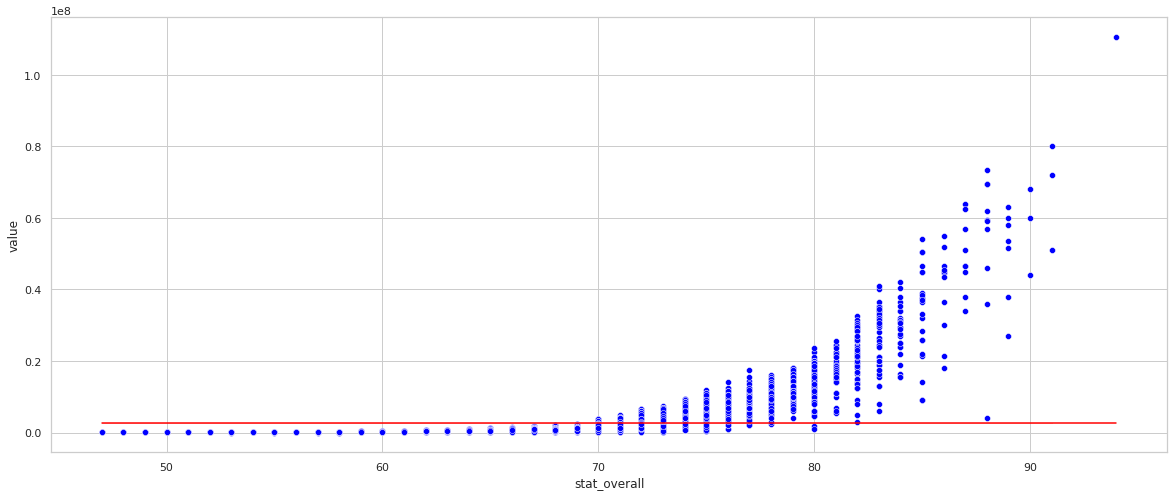

In [117]:
# 평균기준 모델
import seaborn as sns
sns.lineplot(x=train['stat_overall'], y=y_mean_pred, color = 'red')
sns.scatterplot(x=train['stat_overall'],y = train['value'], color = 'blue');

# 모델링
- MAE : 194074
- RMSE : 665132

In [118]:
# !pip install category_encoders

In [119]:
from sklearn.model_selection import train_test_split

train1, val = train_test_split(train, test_size = 0.2, train_size = 0.8, random_state = 2)

features = train.columns.drop(['value'])
target = 'value'

X_train = train1[features]
y_train = train1[target]

X_val = val[features]
y_val = val[target]

In [120]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(random_state=2)
)

TTR = TransformedTargetRegressor(regressor=pipe,
                                func=np.log1p, inverse_func=np.expm1)

TTR.fit(X_train, y_train)

print(TTR.score(X_train, y_train))
print(TTR.score(X_val, y_val))

0.9957455819938817
0.9881407825803926


In [226]:
y_v_pred = TTR.predict(X_val)

print(f'MAE : {mean_absolute_error(y_val,y_v_pred)}')
print(f'RMSE : {mean_squared_error(y_val,y_v_pred)**0.5}')

MAE : 194074.29875649215
RMSE : 665132.8198347191


# 시각화

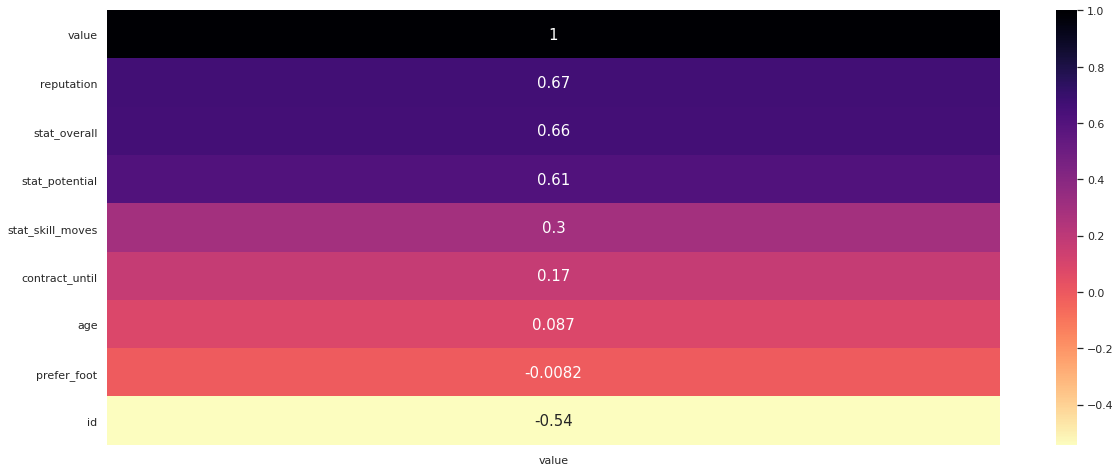

In [122]:
# target과 다른 feature간의 상관계수 
# 뒤에 보면 알 수 있지만, 역시 상관계수가 높다고 좋은 특성은 아님을 보여주는거 같다 

sns.heatmap(train.corr()[['value']].sort_values(by='value', ascending=False),annot=True, cmap="magma_r");

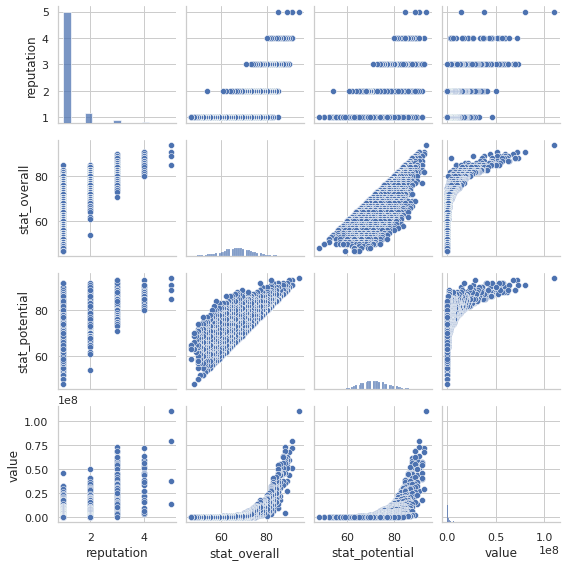

In [123]:
sns.set(style='whitegrid', context='notebook')

cols = ['reputation','stat_overall','stat_potential','value']
sns.pairplot(train[cols],height=2)

Text(0.5, 1.0, 'Title : Reputation')

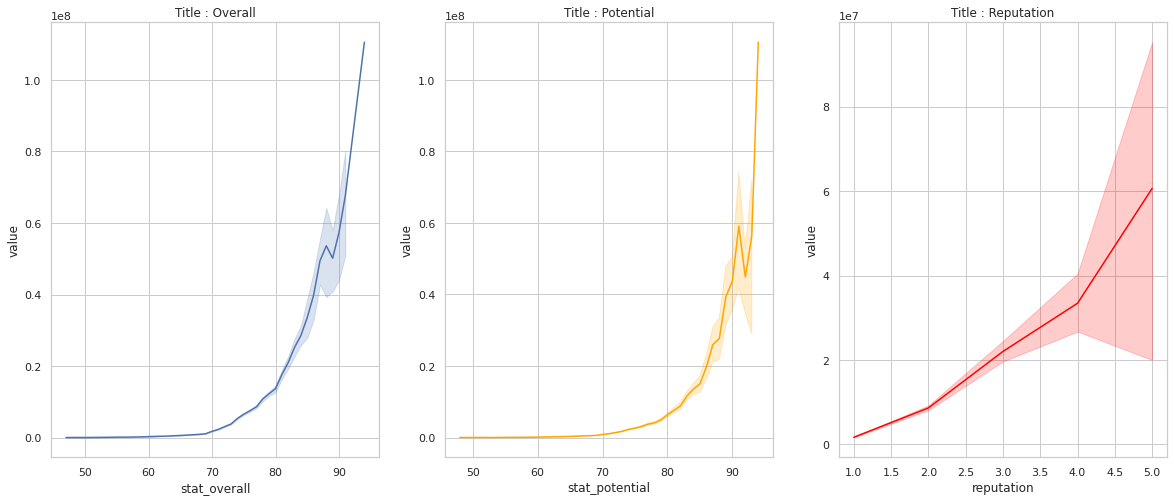

In [124]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams["font.size"] = 15

sns.lineplot(x = train['stat_overall'], y = train[target], ax=ax[0]);
sns.lineplot(x = train['stat_potential'], y = train[target], color='orange',ax=ax[1]);
sns.lineplot(x = train['reputation'], y = train[target], color='red',ax=ax[2]);

ax[0].set_title('Title : Overall')
ax[1].set_title('Title : Potential')
ax[2].set_title('Title : Reputation')

# 2) Xgboost를 사용해 학습하고 기존 모델과 비교해 보세요.
- 본인 포트폴리오 데이터를 Xgboost로 학습하여 기존에 만들었던 모델과 비교합니다.
- **breast cancer 데이터를 Xgboost로 학습하고 f1 score를 제출하세요.(test 데이터에서 0.95이상)**

# (본인 포트폴리오 과제) 이곳에서 과제를 진행해 주세요
- RandomForestRegressor 모델보다 MAE가 더 작아졌다. 
- 하지만 검증세트에 대한 정확도는 아주 조금 떨어졌다.
- MAE_XGB  : 161497
- RMSE_XGB : 726490

In [126]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

pipe_xgb = Pipeline([
                     ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
                     ('XGBR', XGBRegressor(n_estimators=200,
                                           objective='reg:squarederror',
                                           random_state=2,
                                           n_jobs=-1,
                                           max_depth=7,
                                           learning_rate=0.2))])

pipe_xgb.fit(X_train, y_train);

In [129]:
pipe_xgb.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'XGBR', 'preprocessing__memory', 'preprocessing__steps', 'preprocessing__verbose', 'preprocessing__ordinalencoder', 'preprocessing__simpleimputer', 'preprocessing__ordinalencoder__cols', 'preprocessing__ordinalencoder__drop_invariant', 'preprocessing__ordinalencoder__handle_missing', 'preprocessing__ordinalencoder__handle_unknown', 'preprocessing__ordinalencoder__mapping', 'preprocessing__ordinalencoder__return_df', 'preprocessing__ordinalencoder__verbose', 'preprocessing__simpleimputer__add_indicator', 'preprocessing__simpleimputer__copy', 'preprocessing__simpleimputer__fill_value', 'preprocessing__simpleimputer__missing_values', 'preprocessing__simpleimputer__strategy', 'preprocessing__simpleimputer__verbose', 'XGBR__base_score', 'XGBR__booster', 'XGBR__colsample_bylevel', 'XGBR__colsample_bynode', 'XGBR__colsample_bytree', 'XGBR__gamma', 'XGBR__importance_type', 'XGBR__learning_rate', 'XGBR__max_delta_step', 'XGBR__max_depth'

In [130]:
print(pipe_xgb.score(X_train, y_train))
print(pipe_xgb.score(X_val, y_val))

0.9998930993450933
0.9858518846754473


In [225]:
y_pred = pipe_xgb.predict(X_val)

print(f'MAE_XGB : {mean_absolute_error(y_val,y_pred)}')
print(f'RMSE_XGB : {mean_squared_error(y_val,y_pred)**0.5}')

MAE_XGB : 161497.34226985477
RMSE_XGB : 726490.0287196866


# (제출폼 과제) 이곳에서 과제를 진행해 주세요


In [136]:
from sklearn.datasets import load_breast_cancer 

cancer_dataset = load_breast_cancer()

features1 = cancer_dataset.data
target1 = cancer_dataset.target
df = pd.DataFrame(data=features1, columns=cancer_dataset.feature_names)
df['target'] = target1

In [137]:
train_, test_ = train_test_split(df, test_size=0.2, random_state=2)

In [138]:
t_rain, v_al = train_test_split(train_, test_size=0.2, random_state=2)

In [139]:
f = df.columns.drop(['target'])
t = 'target'

xtrain = t_rain[f]
ytrain = t_rain[t]

xval = v_al[f]
yval = v_al[t]

xtest = test_[f]
ytest = test_[t]

In [140]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

pipe_1 = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer(strategy='mean'))),
    ('xgb', XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2))])

pipe_1.fit(xtrain, ytrain);

In [141]:
pipe_1.named_steps

{'preprocessing': Pipeline(memory=None,
          steps=[('ordinalencoder',
                  OrdinalEncoder(cols=[], drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 mapping=[], return_df=True, verbose=0)),
                 ('simpleimputer',
                  SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                missing_values=nan, strategy='mean',
                                verbose=0))],
          verbose=False),
 'xgb': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.2, max_delta_step=0, max_depth=7,
               min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
               nthread=None, objective='binary:logistic', random_state=2,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               si

In [142]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

ypred = pipe_1.predict(xval)

print('검증 정확도: ', accuracy_score(yval, ypred))
print(classification_report(ypred, yval))

검증 정확도:  0.989010989010989
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.98      1.00      0.99        57

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



In [143]:
from sklearn.metrics import f1_score

y2pred = pipe_1.predict(xtest)

print(f'검증 정확도 = {accuracy_score(ytest, y2pred)}')
print(f'F_Score = {f1_score(ytest,y2pred):.2f}')

검증 정확도 = 0.9473684210526315
F_Score = 0.96


# 3) Permutation importances를 계산하고 다른 중요도 결과와 비교해 보세요
- 본인 포트폴리오 데이터를 사용해 만든 모델의 Permutation importances를 계산하세요.
- **breast cancer 데이터를 사용해 만든 모델의 Permutation importances를 계산하고 가장 높은 값을 가지는 특성의 이름을 과제 제출폼에 제출하세요.**
    - eli5 PermutationImportance 사용
    - scoring = 'accuracy'
    - n_iter = 5
    - random_state = 2

In [34]:
!pip install eli5 

     |████████████████████████████████| 112kB 8.1MB/s 


# (본인 포트폴리오 과제) 이곳에서 과제를 진행해 주세요
> XGBRegressor - 일단 가장 좋은 성능을 보여주었다.
- MAE_XGB2 : 157727
- RMSE_XGB2 : 695277

In [160]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance
# permuter 정의

permuter = PermutationImportance(
    pipe_xgb.named_steps['XGBR'], # model
    scoring='neg_mean_squared_error', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe_xgb.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.2,
                                             max_delta_step=0, max_depth=7,
                                             min_child_weight=1, missing=None,
                                             n_estimators=200, n_jobs=-1,
                                             nthread=None,
                                             objective='reg:squarederror',
                                             random_state=2, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=1,
                                

In [161]:
features_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, features_names).sort_values()

contract_until     -3.443262e+10
continent          -2.363763e+10
stat_overall        0.000000e+00
prefer_foot         1.611445e+10
reputation          3.432368e+10
stat_skill_moves    3.108004e+11
position            3.453952e+11
stat_potential      1.650746e+12
age                 2.084387e+12
id                  5.875200e+13
dtype: float64

In [162]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=features_names # list 형식으로 넣어야 합니다
)
# id는 선수 고유 번호이기에 가장 좋은 특성이라고 보기 힘들거같다.

Weight,Feature
58751999151399.4219 ± 3818007537434.4253,id
2084386641653.8027 ± 1224486178563.1421,age
1650746001666.6919 ± 59285079153.9460,stat_potential
345395178347.1757 ± 146644127860.8030,position
310800379543.4698 ± 254928252514.4362,stat_skill_moves
34323676183.7944 ± 9903963705.7719,reputation
16114446149.7150 ± 32018889082.0474,prefer_foot
0 ± 0.0000,stat_overall
-23637633255.0141 ± 44203632646.8166,continent
-34432617891.9990 ± 23318042205.6935,contract_until


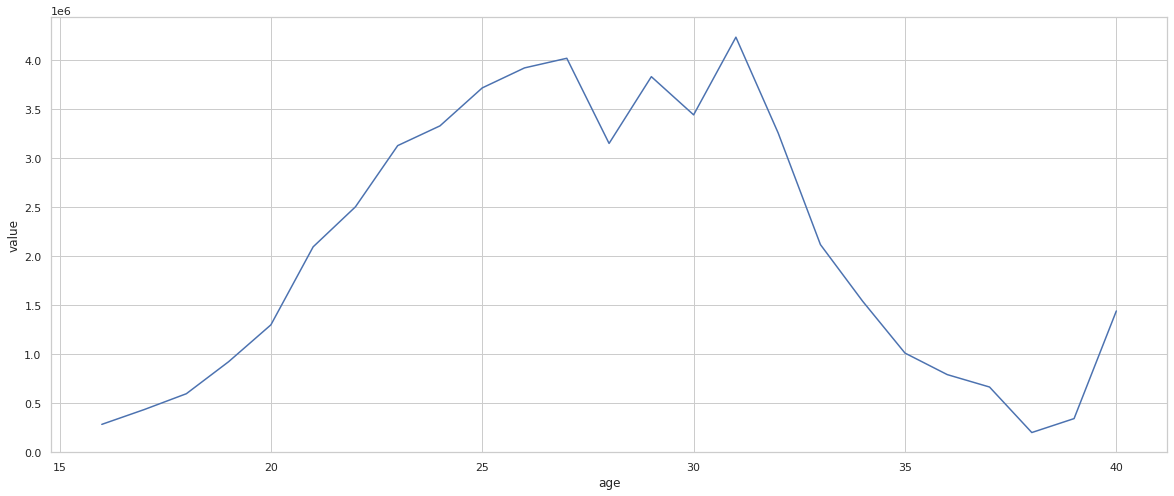

In [168]:
sns.lineplot(x = train['age'], y = train[target], ci = None);

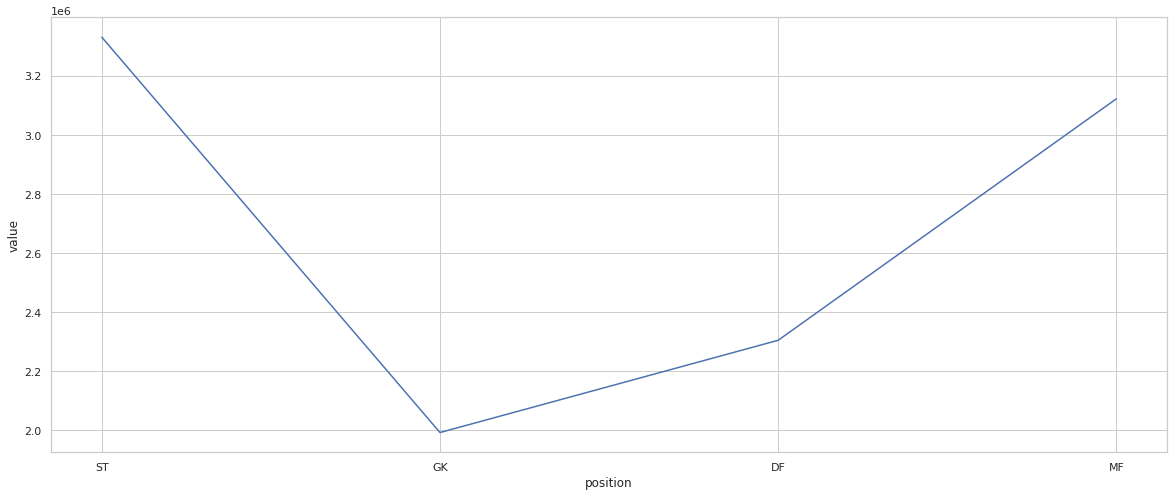

In [169]:
sns.lineplot(x = train['position'], y = train[target],ci = None);

In [180]:
print('특성 삭제 전:', X_train.shape, X_val.shape)

특성 삭제 전: (7145, 10) (1787, 10)


In [182]:
minimum_importance = 0
mask = permuter.feature_importances_ >= minimum_importance
new_features = X_train.columns[mask]
X_train_selected = X_train[features]
X_val_selected = X_val[features]

In [183]:
print('특성 삭제 후:', X_train_selected.shape, X_val_selected.shape)

특성 삭제 후: (7145, 7) (1787, 7)


In [184]:
# pipeline 다시 정의
# objective : objective function이 최소화되는 방향으로 파라미터들을 조정 
pipe_xgb2 = Pipeline([
                     ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
                     ('XGBR', XGBRegressor(n_estimators=200,
                                           objective='reg:squarederror',
                                           random_state=2,
                                           n_jobs=-1,
                                           max_depth=7,
                                           learning_rate=0.2))])

pipe_xgb2.fit(X_train_selected, y_train);

In [185]:
print(pipe_xgb2.score(X_train_selected, y_train))
print(pipe_xgb2.score(X_val_selected, y_val))

0.9998615832519452
0.9870414685147899


In [188]:
from sklearn.metrics import mean_squared_error

y2_pred = pipe_xgb2.predict(X_val_selected)

print(f'MAE_XGB2 : {mean_absolute_error(y_val,y2_pred)}')
print(f'RMSE_XGB2 : {mean_squared_error(y_val,y2_pred)**0.5}')

MAE_XGB2 : 157727.5093105425
RMSE_XGB2 : 695277.6297797532


#(제출폼 과제) 이곳에서 과제를 진행해 주세요


In [146]:
import eli5
from eli5.sklearn import PermutationImportance
# permuter 정의

permuter = PermutationImportance(
    pipe_1.named_steps['xgb'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
x_val_transformed = pipe_1.named_steps['preprocessing'].transform(xval)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(x_val_transformed, yval);

In [147]:
feature_names = x_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

mean smoothness           -0.006593
worst concavity           -0.004396
worst smoothness          -0.004396
mean radius                0.000000
worst compactness          0.000000
worst radius               0.000000
fractal dimension error    0.000000
symmetry error             0.000000
concave points error       0.000000
concavity error            0.000000
compactness error          0.000000
worst symmetry             0.000000
smoothness error           0.000000
worst fractal dimension    0.000000
texture error              0.000000
radius error               0.000000
mean fractal dimension     0.000000
mean symmetry              0.000000
mean concavity             0.000000
mean compactness           0.000000
perimeter error            0.000000
mean texture               0.000000
mean area                  0.000000
mean perimeter             0.000000
mean concave points        0.006593
worst perimeter            0.006593
area error                 0.013187
worst area                 0

In [99]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0198 ± 0.0164,worst texture
0.0154 ± 0.0224,worst concave points
0.0132 ± 0.0215,worst area
0.0132 ± 0.0164,area error
0.0066 ± 0.0108,worst perimeter
0.0066 ± 0.0108,mean concave points
0 ± 0.0000,mean perimeter
0 ± 0.0000,mean area
0 ± 0.0000,mean texture
0 ± 0.0000,perimeter error


In [ ]:
minimum_importance = 0.001
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_val_selected = X_val[features]

# 🔥 도전과제
### 4) Xgboost 외에 다른 부스팅 라이브러리로 모델을 학습시켜 Xgboost와 비교해 보세요.

> GradientBoostingRegressor 사용

- 생각보다 속도가 느리고, XGB보다 성능이 안나온다.

> criterion = 'friedman_mse'
- MAE_GBR : 176966
- RMSE_GBR : 803404

> criterion = 'mse' -> GradientBoostingRegressor에서 제일 좋은 성능 
- MAE_GBR : 176901
- RMSE_GBR : 799695

> criterion = 'mae'
- MAE_GBR : 179565
- RMSE_GBR : 810277

In [231]:
# criterion = 'mae' : 가장 시간비용이 크다. 성능은 별로

from sklearn.ensemble import GradientBoostingRegressor

pipe_GBR = Pipeline([
                     ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
                     ('GBR', GradientBoostingRegressor(n_estimators=100,
                                                       criterion = 'mae',
                                                       random_state=2,
                                                       max_depth=7,
                                                       learning_rate=0.2))])

pipe_GBR.fit(X_train_selected, y_train);

In [232]:
print(pipe_GBR.score(X_train_selected, y_train))
print(pipe_GBR.score(X_val_selected, y_val))

0.9993832729766039
0.9824002292567681


In [233]:
y_G_pred = pipe_GBR.predict(X_val_selected)

print(f'MAE_GBR : {mean_absolute_error(y_val,y_G_pred)}')
print(f'RMSE_GBR : {mean_squared_error(y_val,y_G_pred)**0.5}')

MAE_GBR : 179565.25327152378
RMSE_GBR : 810277.6644335478


In [234]:
pipe_GBR.named_steps['GBR'].feature_importances_

array([0.7550844 , 0.06783712, 0.02030177, 0.00172418, 0.0020939 ,
       0.12706774, 0.0258909 ])